# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.469  1  0.635 0.426 0.003   
                             age        0.007  1  0.010 0.921 0.000   
                             Kiel       2.116  1  2.863 0.092 0.015   
                             Magdeburg  6.488  1  8.778 0.003 0.044   
                             Sweden    10.051  1 13.598 0.000 0.066   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.224  1  0.215 0.643 0.001   
                             age        0.950  1  0.913 0.341 0.005   
                             Kiel       0.020  1  0.019 0.890 0.000   
                             Magdeburg  2.836  1  2.724 0.100 0.014   
                             Sweden    18.071  1 17.361 0.000 0.083   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.370  0.588    False  
                             age               0.036  0.956    False  
                             Kiel              1.035  0.196    False  
                             Magdeburg         2.464  0.014     True  
                             Sweden            3.530  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.192  0.767    False  
                             age               0.468  0.505    False  
                             Kiel              0.050  0.938    False  
                             Magdeburg         0.998  0.210    False  
                             Sweden            4.330  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.058  1  7.549 0.007 0.038   
                             age        0.010  1  0.068 0.794 0.000   
                             Kiel       0.297  1  2.121 0.147 0.011   
                             Magdeburg  0.492  1  3.513 0.062 0.018   
                             Sweden     1.739  1 12.410 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.221  1  4.330 0.039 0.022   
                             age        0.497  1  0.969 0.326 0.005   
                             Kiel       2.540  1  4.951 0.027 0.025   
                             Magdeburg  2.734  1  5.330 0.022 0.027   
                             Sweden    19.882  1 38.755 0.000 0.169   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.182  0.019     True  
                             age               0.100  0.861    False  
                             Kiel              0.833  0.245    False  
                             Magdeburg         1.205  0.123    False  
                             Sweden            3.272  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.411  0.083    False  
                             age               0.487  0.457    False  
                             Kiel              1.565  0.062    False  
                             Magdeburg         1.657  0.052    False  
                             Sweden            8.525  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.426         0.370  0.588    False   
                             Kiel      0.092         1.035  0.196    False   
                             Magdeburg 0.003         2.464  0.014     True   
                             Sweden    0.000         3.530  0.002     True   
                             age       0.921         0.036  0.956    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.643         0.192  0.767    False   
                             Kiel      0.890         0.050  0.938    False   
                             Magdeburg 0.100         0.998  0.210    False   
                             Sweden    0.000         4.330  0.000     True   
                             age       0.341         0.468  0.505    False   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.182  0.019     True  
                             Kiel      0.147         0.833  0.245    False  
                             Magdeburg 0.062         1.205  0.123    False  
                             Sweden    0.001         3.272  0.002     True  
                             age       0.794         0.100  0.861    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.039         1.411  0.083    False  
                             Kiel      0.027         1.565  0.062    False  
                             Magdeburg 0.022         1.657  0.052    False  
                             Sweden    0.000         8.525  0.000     True  
                             age       0.326         0.487  0.457    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.479     0.338     0.224         3.324     0.276
std       0.303         5.320     0.331     0.294         6.215     0.321
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.004         0.329     0.015     0.000         0.409     0.002
50%       0.120         0.919     0.241     0.057         1.246     0.114
75%       0.469         2.414     0.626     0.390         3.346     0.520
max       0.998       140.053     0.998     1.000        86.500     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_50166/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.426         0.370   
A0A024R0T9;K7ER74;P02655                           AD     0.039         1.406   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.063         1.204   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.598         0.223   
A0A075B6H7                                         AD     0.109         0.964   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.025         1.602   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.408         0.390   
S4R3U6                                             AD     0.643         0.192   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.588    False   
A0A024R0T9;K7ER74;P02655                           AD      0.101    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.145    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.732    False   
A0A075B6H7                                         AD      0.223    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.071    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.569    False   
S4R3U6                                             AD      0.767    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.182   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.485   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.349         0.458   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.254         0.595   
A0A075B6H7                                         AD     0.009         2.039   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.191         0.719   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.793         0.101   
S4R3U6                                             AD     0.039         1.411   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.019     True  
A0A024R0T9;K7ER74;P02655                           AD      0.072    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.479    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.377    False  
A0A075B6H7                                         AD      0.025     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.398     0.337     0.242         1.585     0.301
std       0.295         1.584     0.320     0.295         1.836     0.318
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.012         0.355     0.038     0.007         0.379     0.020
50%       0.117         0.930     0.237     0.090         1.046     0.166
75%       0.441         1.939     0.601     0.418         2.151     0.547
max       0.997        18.964     0.997     0.999        21.144     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1029,936


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.426         0.370  0.588   
A0A024R0T9;K7ER74;P02655                           0.039         1.406  0.101   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.063         1.204  0.145   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.598         0.223  0.732   
A0A075B6H7                                         0.109         0.964  0.223   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.025         1.602  0.071   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.408         0.390  0.569   
S4R3U6                                             0.643         0.192  0.767   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A024R0T9;K7ER74;P02655                              False 0.033   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.349   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.254   
A0A075B6H7                                            False 0.009   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.191   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.793   
S4R3U6                                                False 0.039   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.182  0.019   
A0A024R0T9;K7ER74;P02655                                   1.485  0.072   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.458  0.479   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.595  0.377   
A0A075B6H7                                                 2.039  0.025   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.283   
Q9Y6X5                                                     0.719  0.302   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.156   
Q9Y6Y9                                                     0.101  0.861   
S4R3U6                                                     1.411  0.083   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    878
PI (yes) - VAE (yes)   334
PI (no)  - VAE (yes)   151
PI (yes) - VAE (no)     58
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_50166/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.426         0.370  0.588    False 0.007   
A0A075B6H7                   0.109         0.964  0.223    False 0.009   
A0A075B6I0                   0.017         1.769  0.052    False 0.001   
A0A075B6J9                   0.044         1.352  0.111    False 0.020   
A0A075B6Q5                   0.526         0.279  0.673    False 0.007   
...                            ...           ...    ...      ...   ...   
Q9ULP0-3;Q9ULP0-6            0.016         1.789  0.050    False 0.000   
Q9UNW1                       0.005         2.340  0.018     True 0.954   
Q9UP79                       0.167         0.778  0.304    False 0.000   
Q9UQ52                       0.146         0.835  0.276    False 0.000   
Q9Y6C2                       0.791         0.102  0.872    False 0.007   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.182  0.019     True       186  
A0A075B6H7                           2.039  0.025     True        91  
A0A075B6I0                           3.133  0.003     True       194  
A0A075B6J9                           1.693  0.048     True       156  
A0A075B6Q5                           2.160  0.020     True       104  
...                                    ...    ...      ...       ...  
Q9ULP0-3;Q9ULP0-6                    3.456  0.001     True       136  
Q9UNW1                               0.020  0.970    False       171  
Q9UP79                               4.622  0.000     True       135  
Q9UQ52                               3.310  0.002     True       188  
Q9Y6C2                               2.142  0.020     True       119  

[209 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.588,0.019,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.101,0.072,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.145,0.479,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.732,0.377,196,PI (no) - VAE (no)
A0A075B6H7,0.223,0.025,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.283,197,PI (no) - VAE (no)
Q9Y6X5,0.071,0.302,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.156,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A6NCT7;Q07092;Q07092-2,0.991,0.003,147,PI (no) - VAE (yes),0.987
K7EQG1;Q9NXS2;Q9NXS2-3,0.996,0.026,53,PI (no) - VAE (yes),0.970
P37802;P37802-2;X6RJP6,0.008,0.977,110,PI (yes) - VAE (no),0.969
P52758,0.000,0.960,119,PI (yes) - VAE (no),0.960
Q9UNW1,0.018,0.970,171,PI (yes) - VAE (no),0.952
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.046,197,PI (no) - VAE (yes),0.011
Q9NX62,0.056,0.045,197,PI (no) - VAE (yes),0.011
P00740;P00740-2,0.053,0.042,197,PI (no) - VAE (yes),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


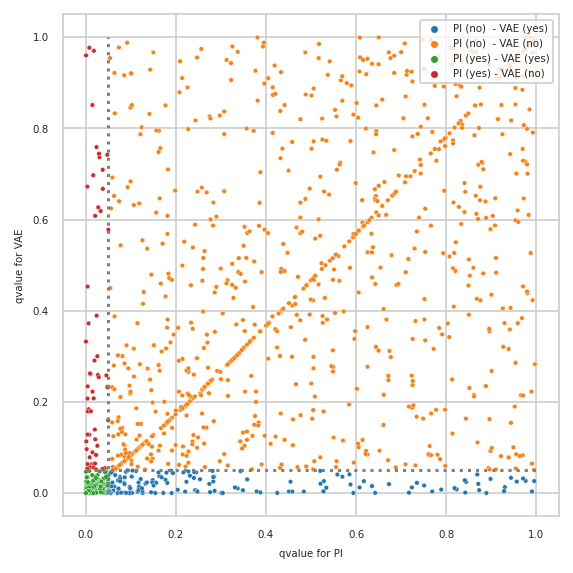

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


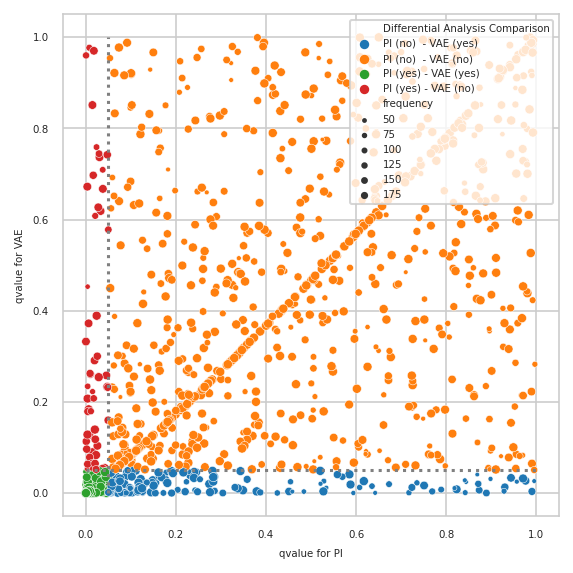

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/9315d83d47168fa3da1739d7e683ad72_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out